In [2]:
import numpy as np
import cv2
from New_PCA import NPCA
from Classify import Classify
import matplotlib.pyplot as plt
from FaceDetection import FaceDetection 

In [3]:
Model = Classify()
pca = NPCA()
Face = FaceDetection()

In [4]:
Model.load_weights()

In [5]:
pca.load_preprocessing()

mu:(4096,)
std dev:(4096,)
vecs :(4096, 99)
vals :(257,)


In [6]:
Model.number

5

5


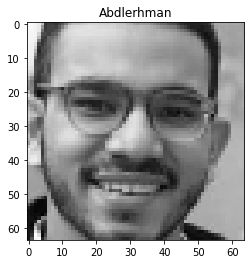

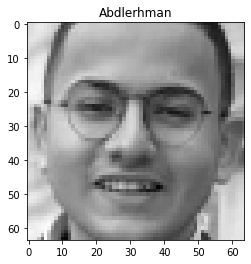

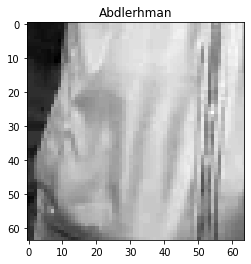

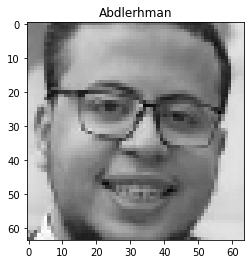

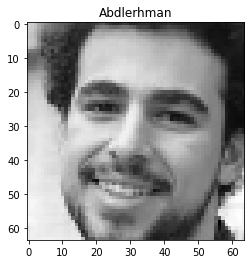

In [9]:
import cv2
names = ['Ahmed','Rabea','Nasser','Dina','Abdlerhman']
X_try = cv2.imread('../2.jpeg',0)
n,dim  = Face.detect_faces('../2.jpeg')
print(n)
imgs_n = []
pred = []
for i in range(n):
    new_img = X_try[dim[i][1]:dim[i][1]+dim[i][3],dim[i][0]:dim[i][0]+dim[i][2]]
    new_img = cv2.resize(new_img,(64,64))
    imgs_n.append(new_img)
imgs_n = np.array(imgs_n)
ll = pca.preprocess_data(imgs_n)
ll = pca.reduce_dim(ll)
for i in range(n):
    # y_hat = SVmmodel.predict(ll[i].reshape(1,-1))
    y_hat = Model.predict(ll[i,:])
    pred.append(names[y_hat]) 
    plt.title(pred[i])
    plt.imshow(imgs_n[i],cmap="gray")
    plt.show()